# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for city in cities:
    query_url = base_url + "q=" + city + "&appid=" + weather_api_key
    print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperialq=puerto ayora&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=thompson&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=tasiilaq&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=illapel&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=kapaa&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=coquimbo&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=bengkulu&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=sakaiminato&appid=d4d490e496910c8fa9ad24fbf7bc1ede
http://api.openweathermap.org/data/2.5/weather?units=Imperialq=saint-joseph&appid=d4d490e496910c8fa9ad24fbf7b

In [4]:
# List for holding weather datas
data_list = []


# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"


count = 0
set = 1

# For loop to check weather of each city
for city in cities:
    
    if count > 49:
            count = 1
            set+=1

    count += 1
            
    try:
        query_url = base_url + "q=" + city + "&appid=" + weather_api_key
        response = requests.get(query_url).json()
        cloud = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        data_list.append({
            "City": city,
            "Cloudiness": cloud ,
            "Country": country,
            "Date": date, 
            "Humidity": humidity,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Wind Speed": wind_speed})
           
        print(f"Processing Record {count} of Set {set} | {city}")
        time.sleep(1.05)
        
        
    except Exception: 
        print("City not found! Next...")
              
    
        
    

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | illapel
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | sakaiminato
Processing Record 9 of Set 1 | saint-joseph
Processing Record 10 of Set 1 | porto novo
City not found! Next...
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | bitkine
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | kushima
Processing Record 21 of Set 1 | bathsheba
Processing Record 22 of Set 1 | hermanus
City not found! Next...
City not found! Next...
Processing Record 25 of Set 1 | saint-philippe
Processing Record 26 

Processing Record 11 of Set 5 | providencia
Processing Record 12 of Set 5 | snasa
Processing Record 13 of Set 5 | sao bento do sul
Processing Record 14 of Set 5 | tual
Processing Record 15 of Set 5 | kharan
Processing Record 16 of Set 5 | fort nelson
Processing Record 17 of Set 5 | peniche
Processing Record 18 of Set 5 | butembo
Processing Record 19 of Set 5 | lamballe
Processing Record 20 of Set 5 | oranjestad
Processing Record 21 of Set 5 | mettur
Processing Record 22 of Set 5 | talavera de la reina
Processing Record 23 of Set 5 | kodiak
Processing Record 24 of Set 5 | prado
Processing Record 25 of Set 5 | toguchin
Processing Record 26 of Set 5 | viedma
Processing Record 27 of Set 5 | buala
Processing Record 28 of Set 5 | karratha
Processing Record 29 of Set 5 | kahului
Processing Record 30 of Set 5 | cayambe
Processing Record 31 of Set 5 | puerto del rosario
Processing Record 32 of Set 5 | naze
Processing Record 33 of Set 5 | marquette
Processing Record 34 of Set 5 | bredasdorp
Proc

City not found! Next...
Processing Record 23 of Set 9 | kuusamo
Processing Record 24 of Set 9 | vardo
Processing Record 25 of Set 9 | ayagoz
Processing Record 26 of Set 9 | garissa
Processing Record 27 of Set 9 | uruzgan
Processing Record 28 of Set 9 | point pedro
Processing Record 29 of Set 9 | maridi
Processing Record 30 of Set 9 | forssa
Processing Record 31 of Set 9 | shenjiamen
Processing Record 32 of Set 9 | klaksvik
Processing Record 33 of Set 9 | dossor
Processing Record 34 of Set 9 | manakara
Processing Record 35 of Set 9 | vangaindrano
Processing Record 36 of Set 9 | hermiston
Processing Record 37 of Set 9 | praia da vitoria
Processing Record 38 of Set 9 | yamada
Processing Record 39 of Set 9 | kathua
Processing Record 40 of Set 9 | sabha
Processing Record 41 of Set 9 | tuxpan
Processing Record 42 of Set 9 | ambilobe
Processing Record 43 of Set 9 | swan river
Processing Record 44 of Set 9 | ngawi
Processing Record 45 of Set 9 | aykhal
Processing Record 46 of Set 9 | cabra
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = pd.DataFrame(data_list)
weather.head()

output = weather.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

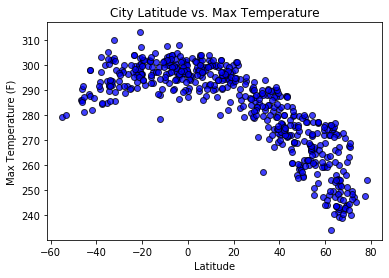

In [6]:
lat_temp = plt.scatter(weather["Lat"], weather["Max Temp"], marker='o', facecolors="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("LatVSTemp.png")
plt.show()

In [7]:
# In the North Hemisphere, as Latitute increases, maximum temperature increases; in the South Hemisphere, as Latitude increases, maximum temperature drops.

#### Latitude vs. Humidity Plot

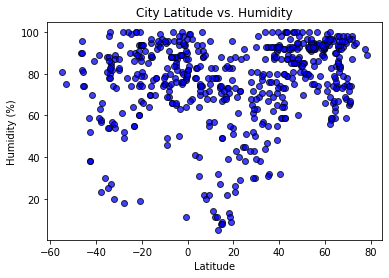

In [8]:
lat_hum = plt.scatter(weather["Lat"], weather["Humidity"], marker='o', facecolors="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatVSHumidity.png")
plt.show()


In [9]:
# Humidity as relatively high for either side, but humidity is relatively low around equator.

#### Latitude vs. Cloudiness Plot

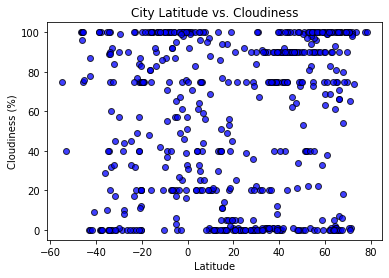

In [10]:
lat_cloud = plt.scatter(weather["Lat"], weather["Cloudiness"], marker='o', facecolors="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatVSCloudiness.png")
plt.show()

In [11]:
# No obvious patttern, scatter plot is evenly spreaded. No correlation between Latitude and Cloudiness. 

#### Latitude vs. Wind Speed Plot

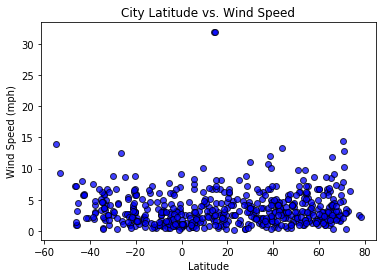

In [12]:
lat_wind = plt.scatter(weather["Lat"], weather["Wind Speed"], marker='o', facecolors="blue", edgecolor="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("LatVSWindSpeed.png")
plt.show()

In [13]:
# Latitude doesn't affect Wind Speed, and there is an outlier. 

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linreg(x_value, y_value, title, xycoords):
    (slope, intercept, r_value, p_value, stderr) = linregress(x_value, y_value)
    fit = slope * x_value + intercept

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(x_value, y_value)
    plt.plot(x_value, fit, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(line_eq,xycoords,fontsize=15,color="red")
    
    # Print r square value
    print(f"The r-squared is: {r_value}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

north_hem = weather.loc[(weather['Lat'] >= 0)]
south_hem = weather.loc[(weather['Lat'] < 0)]
north_hem
south_hem


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,39,EC,1580266934,11,-0.74,-90.35,296.48,0.89
3,illapel,17,CL,1580267129,89,-31.63,-71.17,285.69,0.87
5,coquimbo,90,CL,1580266876,82,-29.95,-71.34,291.15,2.60
6,bengkulu,100,ID,1580267133,94,-3.80,102.27,295.62,6.09
8,saint-joseph,40,RE,1580267000,60,-21.37,55.62,296.15,3.60
...,...,...,...,...,...,...,...,...,...
540,santa maria,99,BR,1580267640,94,-29.68,-53.81,296.15,3.10
544,kiama,40,AU,1580267827,54,-34.68,150.87,302.59,4.60
545,corrente,100,BR,1580267829,98,-3.74,-43.34,296.51,0.83
546,boqueirao,40,BR,1580267830,88,-7.50,-36.13,297.15,4.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.71x +304.72
The r-squared is: -0.873721983050384


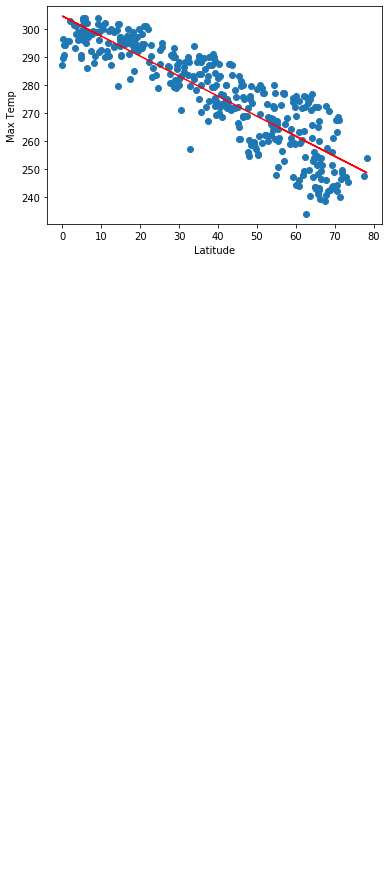

<Figure size 432x288 with 0 Axes>

In [16]:
x_value = north_hem["Lat"]
y_value = north_hem["Max Temp"]

plot_linreg(x_value, y_value, "Max Temp", (0, 0) )

plt.savefig("LatVSTemp_north.png")

In [17]:
# In the North Hemisphere, as Latitute increases, maximum temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.19x +300.08
The r-squared is: 0.4366808044510127


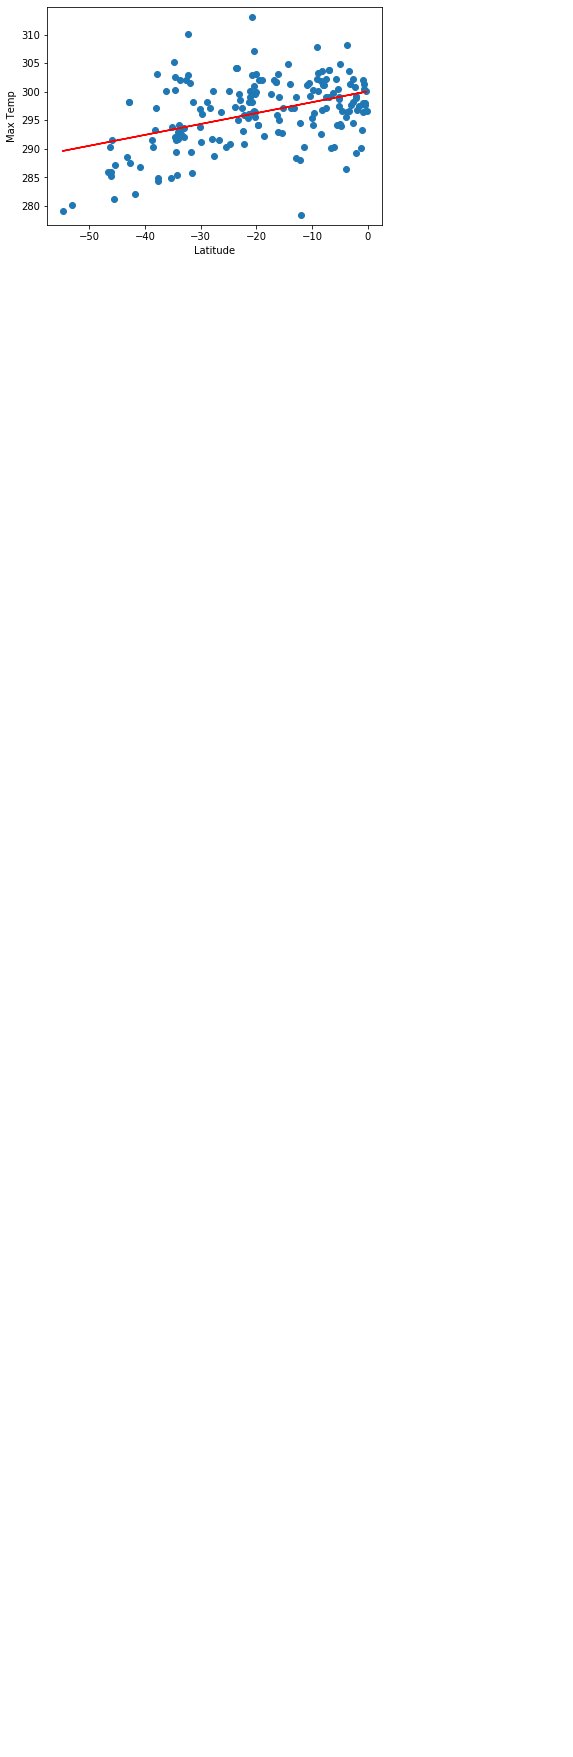

<Figure size 432x288 with 0 Axes>

In [18]:
x_value = south_hem["Lat"]
y_value = south_hem["Max Temp"]

plot_linreg(x_value, y_value, "Max Temp", (10, 10))
plt.savefig("LatVSTemp_south.png")


In [19]:
# In the South Hemisphere, as Latitude increases, maximum temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.4x +60.13
The r-squared is: 0.3961802402698569


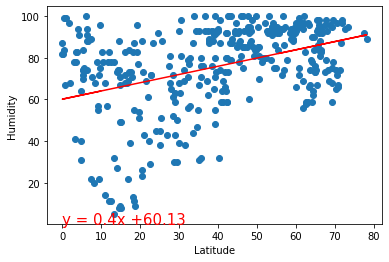

<Figure size 432x288 with 0 Axes>

In [20]:
x_value = north_hem["Lat"]
y_value = north_hem["Humidity"]
plot_linreg(x_value, y_value, "Humidity", (0, 0) )

plt.savefig("LatVSHumidity_north.png")

In [21]:
# As Latitude increases, the humidity increases as well. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.19x +300.08
The r-squared is: 0.4366808044510127


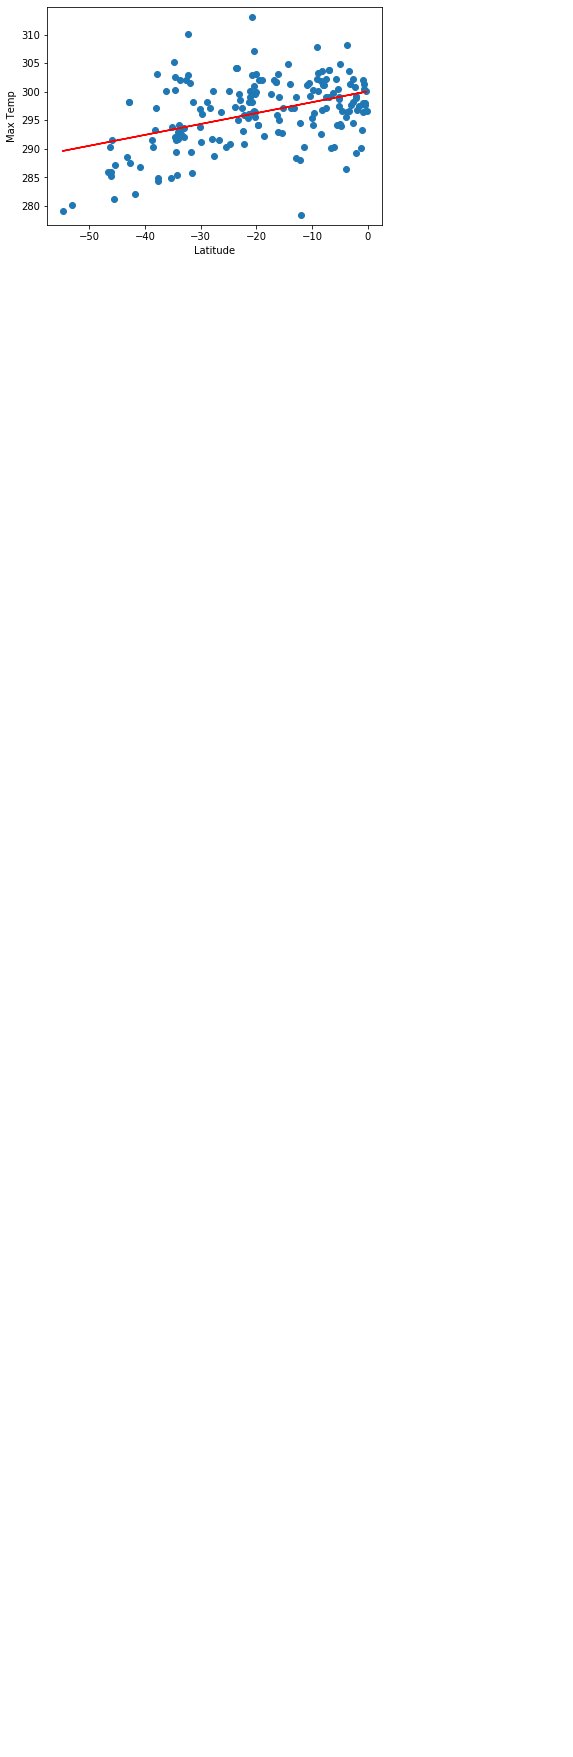

<Figure size 432x288 with 0 Axes>

In [22]:
x_value = south_hem["Lat"]
y_value = south_hem["Max Temp"]
plot_linreg(x_value, y_value, "Max Temp", (10, 10))

plt.savefig("LatVSHumidity_south.png")


In [23]:
# As Latitude increases, the humidity increases as well. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.5x +35.3
The r-squared is: 0.26231133307573407


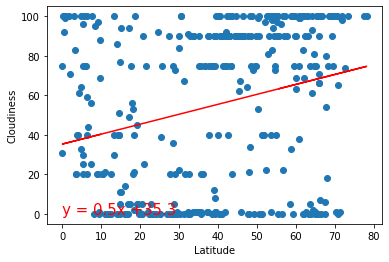

<Figure size 432x288 with 0 Axes>

In [24]:
x_value = north_hem["Lat"]
y_value = north_hem["Cloudiness"]
plot_linreg(x_value, y_value, "Cloudiness", (0, 0) )

plt.savefig("LatVSCloudiness_north.png")

In [25]:
# No obvious patttern, scatter plot is evenly spreaded. No correlation between Latitude and Cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.45x +66.73
The r-squared is: 0.16134026016154573


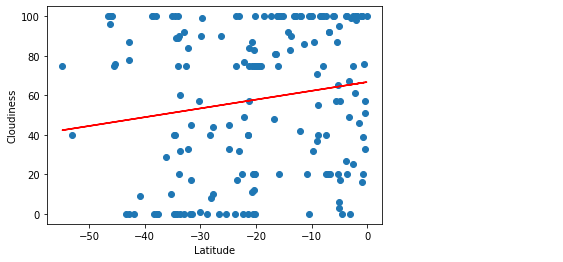

<Figure size 432x288 with 0 Axes>

In [26]:
x_value = south_hem["Lat"]
y_value = south_hem["Cloudiness"]

plot_linreg(x_value, y_value, "Cloudiness", (10, 10))
plt.savefig("LatVSCloudiness_south.png")

In [27]:
# No obvious patttern, scatter plot is evenly spreaded. No correlation between Latitude and Cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x +3.36
The r-squared is: 0.05246258016828528


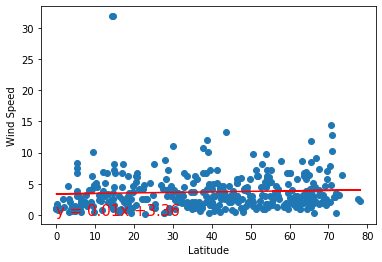

<Figure size 432x288 with 0 Axes>

In [28]:
x_value = north_hem["Lat"]
y_value = north_hem["Wind Speed"]
plot_linreg(x_value, y_value, "Wind Speed", (0, 0) )

plt.savefig("LatVSWindSpeed_north.png")


In [29]:
# Wind Speed is even across the North Hemisphere, there is an obvious outlier. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.06x +2.18
The r-squared is: -0.3215912035540306


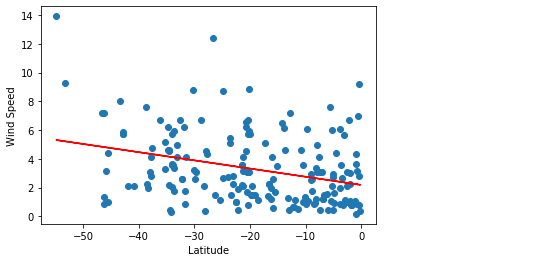

<Figure size 432x288 with 0 Axes>

In [30]:
x_value = south_hem["Lat"]
y_value = south_hem["Wind Speed"]
plot_linreg(x_value, y_value, "Wind Speed", (10, 10))

plt.savefig("LatVSWindSpeed_south.png")


In [31]:
# As Latitude increases, Wind Speed decreases. 